In [48]:
import os
import sys
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [7]:
def load_images(directory):
    size = 416
    images = []
    
    for filename in sorted(os.listdir(directory)):
        images += [np.asarray(Image.open(os.path.join(directory, filename)).convert('RGB').resize((size, size)))]
    
    return images

In [8]:
def load_activations(root):
    paths = sorted([f for f in os.listdir(root) if os.path.isfile(os.path.join(root, f))])
    actvs = []
    
    for path in paths:
        path = os.path.join(root, path)
        actvs += [np.load(path).squeeze(0)]
    
    return actvs

In [9]:
images = load_images("/home/sadjad/projects/nnfc-temp/traffic/training/")

In [10]:
activations = load_activations("/home/sadjad/projects/nnfc-temp/traffic/activations/")

In [13]:
len(images)
len(activations)
images[0].shape
activations[0].shape

(256, 52, 52)

In [36]:
MSE = lambda x, y: ((x - y) ** 2).mean()

In [38]:
print(MSE(images[0], images[1]))

18.3080255332


In [40]:
images_diffs = []
activations_diffs = []

for i in range(1, len(images)):
    images_diffs += [MSE(images[i], images[i - 1])]
    activations_diffs += [MSE(activations[i], activations[i - 1])]

In [41]:
len(images_diffs)

999

# Stats

In [70]:
print("mean for images:", np.mean(images_diffs))
print("stdev for images:", np.std(images_diffs))
print()
print("mean for activations:", np.mean(activations_diffs))
print("stdev for activations:", np.std(activations_diffs))

mean for images: 1.6317833123
stdev for images: 3.70882425019

mean for activations: 0.0125979
stdev for activations: 0.0257103


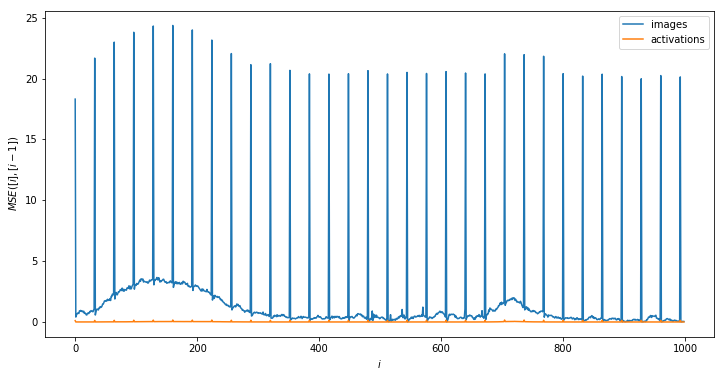

In [67]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(range(999), images_diffs, label='images')
plt.plot(range(999), activations_diffs, label='activations')
plt.xlabel('$i$')
plt.ylabel('$MSE([i], [i-1])$')
plt.legend()